In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

# Part 2: Ridge Regression

## Question 4.1

**Error function definition**

Firstly, we define the error function for linear regression, which measures how well the model predicts the target values. The error is the Mean Squared Error (MSE), given by:
\begin{equation*}
E(\mathbf{w}) = \frac{1}{2N} \sum_{n=1}^N (t_i - y(\mathbf{x}_i, \mathbf{w}))^2
\end{equation*}


This function captures the squared difference between the actual and predicted values for all training examples, averaged over the number of examples. For Ridge Regression, we add an $L 2$ regularization term to the error function to penalize large weights. The regularized error function is defined as:


$$
E(\mathbf{w}) = \frac{1}{2N} \sum_{n=1}^N (t_i - y(\mathbf{x}_i, \mathbf{w}))^2+\frac{\lambda}{2}\|\mathbf{w}\|^2
$$


where:
- $\mathbf{w}$ is the vector of weights.
- $\mathbf{x}^{(i)}$ is the feature vector for the $i$-th example.
- $t^{(i)}$ is the target value for the $i$-th example.
- $N$ is the number of training examples.
- $\lambda$ is the regularization parameter.
- $\|\mathbf{w}\|^2=\mathbf{w}^T \mathbf{w}$ is the $L 2$ norm of the weight vector.

**Matrix Form of the MSE:**

We can express the summation term (Mean Squared Error) in matrix form. Let:
- $\mathbf{X}$ be the design matrix, where each row $\mathbf{x}_n^T$ corresponds to the feature vector for each training example.
- w be the weight vector (parameters).
- $\mathbf{t}$ be the vector of target values (i.e., the true labels).

Then, the predicted values for all $N$ data points can be written as $\mathrm{X} \mathbf{w}$, where:

$$
\mathbf{X} \mathbf{w}=\left[\begin{array}{c}
\mathbf{x}_1^{\top} \mathbf{w} \\
\mathbf{x}_2^{\top} \mathbf{w} \\
\vdots \\
\mathbf{x}_N^{\top} \mathbf{w}
\end{array}\right]
$$


The MSE term can be rewritten as:

$$
\frac{1}{2 N} \sum_{n=1}^N\left(t_n-\mathbf{x}_n^{\top} \mathbf{w}\right)^2=\frac{1}{2 N}\|\mathbf{t}-\mathbf{X} \mathbf{w}\|^2
$$


Where $\|\mathbf{t}-\mathbf{X w}\|^2$ is the squared Euclidean norm of the difference between the target vector $\mathbf{t}$ and the predicted values $\mathbf{X w}$.

Regularization Term in Vector Notation:
The $L_2$-regularization term penalizes large weights, and is given by:

$$
\frac{\lambda}{2}\|\mathbf{w}\|^2=\frac{\lambda}{2} \mathbf{w}^{\top} \mathbf{w}
$$


This ensures that the weights $\mathbf{w}$ do not grow too large, controlling the complexity of the model and helping prevent overfitting.

Full Error Function in Matrix Form:
Putting it all together, the full error function in matrix form is:

$$
E(\mathbf{w})=\frac{1}{2 N}\|\mathbf{t}-\mathbf{X} \mathbf{w}\|^2+\frac{\lambda}{2} \mathbf{w}^{\top} \mathbf{w}
$$

After that, we try to minimize that error function using derivative on W and matrix notation. The first term in the error function is the MSE:

$$
\frac{1}{2 N}\|\mathbf{t}-\mathbf{X} \mathbf{w}\|^2
$$


Taking the derivative with respect to w:

$$
\nabla_{\mathbf{w}}\left(\frac{1}{2 N} \sum_{i=1}^N\left\|t_i-\mathbf{x}_i^{\top} \mathbf{w}\right\|^2\right)=-\frac{1}{N} \mathbf{X}^{\top}(\mathbf{y}-\mathbf{X} \mathbf{w})
$$


Where:
- $\mathbf{X}$ is the design matrix of size $N \times p$, where each row is a feature vector $\mathbf{x}_i$.
- $\mathbf{y}$ is the vector of target values.
(b) Derivative of the Regularization Term

The second term in the error function is the regularization term:

$$
\frac{\lambda}{2}\|\mathbf{w}\|^2=\frac{\lambda}{2} \mathbf{w}^T \mathbf{w}
$$


Taking the derivative with respect to w:

$$
\nabla_{\mathbf{w}}\left(\frac{\lambda}{2} \mathbf{w}^T \mathbf{w}\right)=\lambda \mathbf{w}
$$


Step 4: Combining the Derivatives
Now, combine the two gradient terms from the MSE and the regularization:

$$
\nabla_{\mathbf{w}} E(\mathbf{w})=-\frac{1}{N} \mathbf{X}^T(\mathbf{y}-\mathbf{X} \mathbf{w})+\lambda \mathbf{w}
$$


Step 5: Setting the Gradient to Zero
To find the weights $\mathbf{w}$ that minimize the error, set the gradient equal to zero:

$$
-\frac{1}{N} \mathbf{X}^T(\mathbf{y}-\mathbf{X} \mathbf{w})+\lambda \mathbf{w}=0
$$


Multiply through by $N$ to simplify:

$$
-\mathbf{X}^T(\mathbf{y}-\mathbf{X} \mathbf{w})+N \lambda \mathbf{w}=0
$$

Expand the first term:

$$
-\mathbf{X}^T \mathbf{y}+\mathbf{X}^T \mathbf{X} \mathbf{w}+N \lambda \mathbf{w}=0
$$


Rearranging the equation gives:

$$
\mathbf{X}^T \mathbf{X} \mathbf{w}+N \lambda \mathbf{w}=\mathbf{X}^T \mathbf{y}
$$

We can now solve for $\mathbf{w}$ by isolating it on the left-hand side:

$$
\mathbf{w}=\left(\mathbf{X}^T \mathbf{X}+N \lambda \mathbf{I}\right)^{-1} \mathbf{X}^T \mathbf{y}
$$


Where $\mathbf{I}$ is the identity matrix. This equation gives the closed-form solution for the weights $\mathbf{w}$ in Ridge Regression, which will be applied in later questions


## Question 4.2

In this section, we will create a RidgeRegressionGD class that accepts lambda ($λ$) as an initialization parameter. The class will fit the model to the training data, test it using the closed-form solution presented earlier, and provide predictions.

In [16]:
class RidgeRegressionGD:
    def __init__(self, lambda_=0.1):
        """
        Initializes the Ridge Regression model with a given regularization parameter (lambda).
        
        Parameters:
        - lambda_: L2 regularization parameter (default is 0.1). Controls the strength of the regularization.
        """
        self.lambda_ = lambda_  # L2 regularization parameter (lambda)
        self.weights = None  # This will store the learned weights after training
    
    def fit(self, X, y):
        """
        Fit the Ridge Regression model using the closed-form solution.
        
        Parameters:
        - X: Input feature matrix of shape (n_samples, n_features)
        - y: Target vector of shape (n_samples,)
        
        Returns:
        - self: The trained model with learned weights.
        """
        # Compute the number of features (columns) in the input matrix X
        n_features = X.shape[1]
        
        # Create an identity matrix of size equal to the number of features
        I = np.eye(n_features)
        
        # Apply the closed-form solution for Ridge Regression:
        # w = (X^T X + λI)^(-1) X^T y
        # This solves for the weight vector that minimizes the regularized cost function
        self.weights = np.linalg.inv(X.T @ X + self.lambda_ * I) @ X.T @ y
        return self  # Return the model itself for chaining calls if needed
    
    def predict(self, X):
        """
        Predict target values using the learned weight vector from the fit method.
        
        Parameters:
        - X: Input feature matrix of shape (n_samples, n_features)
        
        Returns:
        - Predictions: A vector of predicted values for the input samples.
        """
        # Use the learned weights to make predictions
        return np.dot(X, self.weights)


## Question 4.3a

In this section, we create a **PolynomialFeatures** class to fit the training data using an input degree parameter. Next, we generate synthetic data as specified in the assignment. Finally, we construct a pipeline that includes Stochastic Gradient Descent (SGD) models for each lambda value, where the input data is first transformed into polynomial features before applying Ridge Regression.

In [17]:
class PolynomialFeatures:

    def __init__(self, degree):
        self.degree = degree

    def fit(self, x, y=None):
        return self

    def transform(self, x, y=None):
        output = []
        for i in range(0, self.degree+1):
            column = x**i
            output.append(column)
        return np.column_stack(output)

    def fit_transform(self, x, y=None):
        self.fit(x, y)
        return self.transform(x, y)

# Generate synthetic data
def generate_data(n_samples=1000, random_state=42):
    RNG = np.random.default_rng(random_state)
    X = RNG.uniform(-0.3, 0.3, size=n_samples)
    epsilon = RNG.normal(0, 0.1, size=n_samples)
    Y = (np.cos(3 * np.pi * X) / (2 + 3 * X)) + epsilon
    return X, Y

# Define lambdas and models
lambdas = np.geomspace(10**-10, 0.1, 101, endpoint=True)
SGD_list = [RidgeRegressionGD(lambda_= lamda) for lamda in lambdas]  # Assuming Ridge is used for Ridge regression

# Create pipelines
pipeline_model_list = [make_pipeline(PolynomialFeatures(5), SGD_model) for SGD_model in SGD_list]

## Question 4.3b

After that we run repeated experiments to fit Ridge Regression models with polynomial features, computes the training and test MSE for each model, and averages the MSE across 10 repetitions. The results show the mean MSE for both the training and test sets.

In [18]:
# Initialize lists to store mean squared errors across repetitions
mse_train_reps = []
mse_test_reps = []

# Polynomial degree
degree = 5

# Number of repetitions
n_reps = 10

# Generate data
X_test, Y_test = generate_data(1000, 42)

# Outer loop: Repeat the experiment n_reps times
for rep in range(n_reps):
    
    X_train, Y_train = generate_data(20, np.random.default_rng())
    mse_train = []
    mse_test = []

    for pipeline_model in pipeline_model_list:
        pipeline_model.fit(X_train, Y_train)

        y_train_pred = pipeline_model.predict(X_train)
        y_test_pred = pipeline_model.predict(X_test)
        
        mse_train.append(mean_squared_error(Y_train, y_train_pred))
        mse_test.append(mean_squared_error(Y_test, y_test_pred))
    
    # Store the MSEs from this repetition
    mse_train_reps.append(mse_train)
    mse_test_reps.append(mse_test)

# Convert lists to numpy arrays for easier manipulation
mse_train_reps = np.array(mse_train_reps)
mse_test_reps = np.array(mse_test_reps)

# Calculate the average MSE across repetitions
mean_mse_train = mse_train_reps.mean(axis=0)
mean_mse_test = mse_test_reps.mean(axis=0)

print("Mean training MSE across repetitions: \n", mean_mse_train, '\n')
print("Mean testing MSE across repetitions: \n", mean_mse_test, '\n')


Mean training MSE across repetitions: 
 [0.00755759 0.00755759 0.0075576  0.0075576  0.0075576  0.0075576
 0.00755761 0.00755762 0.00755763 0.00755765 0.00755768 0.00755772
 0.00755778 0.00755787 0.00755801 0.0075582  0.00755848 0.00755887
 0.00755942 0.00756018 0.00756122 0.00756261 0.00756444 0.00756678
 0.00756974 0.00757338 0.00757777 0.00758294 0.00758892 0.0075957
 0.00760328 0.00761164 0.00762078 0.0076307  0.00764143 0.00765304
 0.00766563 0.00767941 0.00769472 0.00771203 0.00773205 0.00775568
 0.00778409 0.00781865 0.00786089 0.00791245 0.00797498 0.00805003
 0.00813891 0.00824258 0.00836147 0.00849538 0.00864329 0.00880335
 0.00897288 0.00914856 0.00932672 0.00950372 0.00967636 0.00984221
 0.00999996 0.01014951 0.01029211 0.01043034 0.01056801 0.01071002
 0.01086219 0.01103084 0.01122242 0.01144284 0.01169689 0.01198767
 0.01231637 0.01268241 0.01308429 0.01352092 0.01399357 0.014508
 0.01507677 0.01572142 0.01647442 0.01738059 0.01849778 0.01989629
 0.02165652 0.02386425 0.0

## Question 4.3c

In this section we plot the result and give key findings

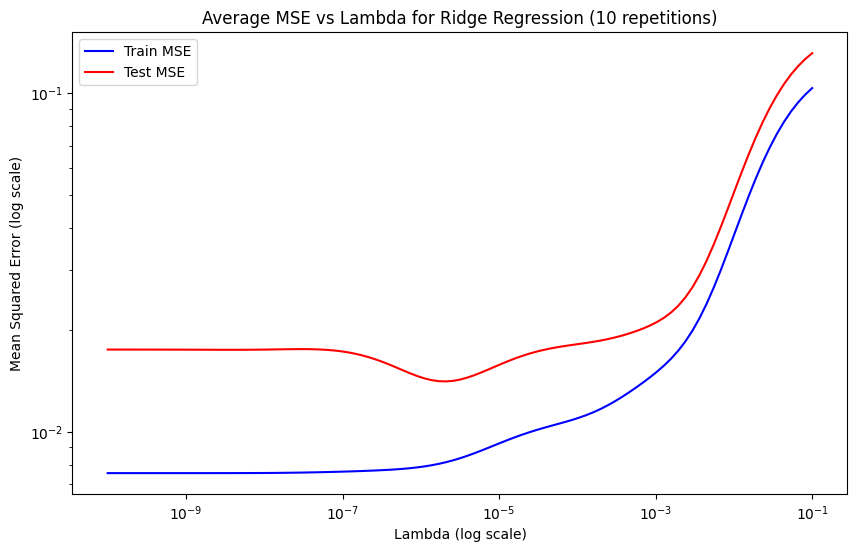

In [19]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(lambdas, mean_mse_train, label='Train MSE', color='blue')
plt.plot(lambdas, mean_mse_test, label='Test MSE', color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Mean Squared Error (log scale)')
plt.title('Average MSE vs Lambda for Ridge Regression (10 repetitions)')
plt.legend()
plt.show()


# Key Insights from the Chart:
**Low Lambda (Near $10^{-9}$ ):**
- The training MSE (blue curve) is very low, indicating the model is fitting the training data almost perfectly.However, the test MSE (red curve) is significantly higher than the training MSE, suggesting overfitting. The model is overly complex, capturing noise in the training data, which results in poor generalization to unseen data.

**Moderate Lambda (between $10^{-7}$ and $10^{-5}$):**
- The test MSE (red curve) reaches its minimum here, indicating the model is best generalizing to the test data. This balance between bias and variance represents the optimal model performance at this $\lambda$ value.
- The training MSE (blue curve) increases slightly, but the test MSE is minimized, showing that regularization helps improve generalization by preventing overfitting.

**High Lambda (Beyond $10^{-5}$):**
- As $\lambda$ increases further, both the training and test MSE rise sharply, indicating underfitting. Excessive regularization makes the model too simple, unable to capture the underlying patterns in the data, resulting in poor performance on both training and test sets.

## Summary of Observations:
- Overfitting at low $\lambda$ values (smaller than $10^{-7}$): $A$ large gap between training and test MSE indicates poor generalization, as the model fits the training data too closely.
- Optimal $\lambda$ around $10^{-7}$ and $10^{-5}$ : The test MSE is minimized, achieving the best trade-off between model complexity and generalization.
- Underfitting at high $\lambda$ values (higher than $10^{-5}$): Over-regularization increases both errors, as the model becomes too simplistic to capture the relevant data structure.

The ideal $\lambda$ for Ridge Regression is approximately $10^{-7}$ and $10^{-5}$, where the model strikes the best balance between fitting the training data and generalizing to new data, minimizing overfitting while maintaining predictive power.